In [1]:
import numpy as np
from numpy import linalg
import random 
import ot
import matplotlib.pyplot as plt

random.seed(10)

In [2]:
## Defining the function
def matrix_scaling(A,r,c, tolerance = 10**(-8)):
    (m,n) = np.shape(A)
    one_m = np.zeros(m) + 1
    one_n = np.zeros(n) + 1
    row_sum = A@one_n
    column_sum = A.T@one_m
    
    x_scale = one_m
    y_scale = one_n
    k = 1
    
    while max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)) > tolerance:
        k = k+1
        if k % 2 == 0:
            x = r/row_sum
            x_scale = x_scale*x
            A = np.diag(x)@A
        else:
            y = c/column_sum
            y_scale = y_scale*y
            A = A@np.diag(y)
                 
        #print(max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)))
        row_sum = A@one_n
        column_sum = A.T@one_m
    
    return x_scale, y_scale, A

In [13]:
#Sampling from chi squared distribution

m = 50 #size of matrix
n = 1000 # #-of samples

sample = np.random.chisquare(1,(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,1000):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   

min_val = []
for i in range(0,1000):
    min_val = min_val + [np.min(matrices[:,:,i])]
    
norm = []
mean = 1/m*(np.zeros((50,50))+1)
for i in range(0,1000):
    norm_1 = [np.linalg.norm(matrices[:,:,i] - mean, 2)]
    norm = norm + norm_1

min_val_2 = []
for i in range(0,1000):
    min_val_2 = min_val_2 + [np.min(matrices[:,:,i]/sample[:,:,i])]
    
max_val_2 = []
for i in range(0,1000):
    max_val_2 = min_val_2 + [np.max(matrices[:,:,i]/sample[:,:,i])]


In [4]:
print("Smallest min value:", np.min(np.array(min_val)), "Largest min value:", np.max(np.array(min_val)))

print("Smallest norm diff:", np.min(np.array(norm)), "Largest norm diff:", np.max(np.array(norm)))

Smallest min value: 2.2118376359481782e-14 Largest min value: 3.2122953731710964e-07
Smallest norm diff: 0.3246372384088571 Largest norm diff: 0.4120043201488594


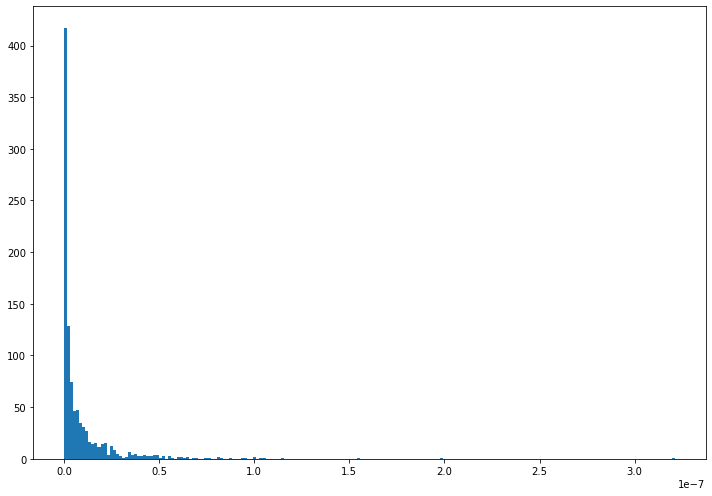

In [5]:
#Histogram of minimum value of the scaled matrices

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(np.array(min_val), bins = 200)
plt.show()

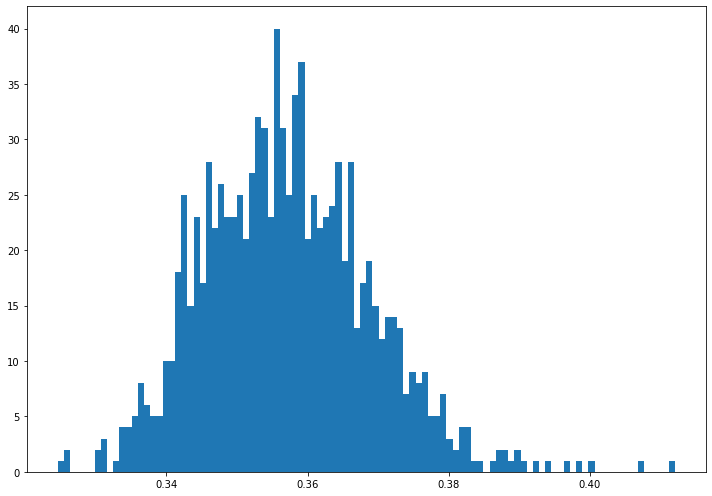

In [6]:
#Histogram of norm diff of the scaled matrices

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(np.array(norm), bins = 100)
plt.show()

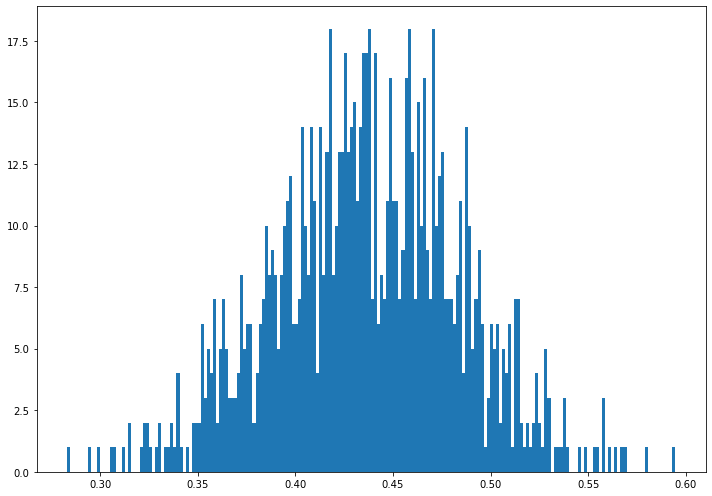

In [12]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(np.array(min_val_2)*50, bins = 200) #Multiplying by factor of 50 to off-set change in row and col sums
plt.show()

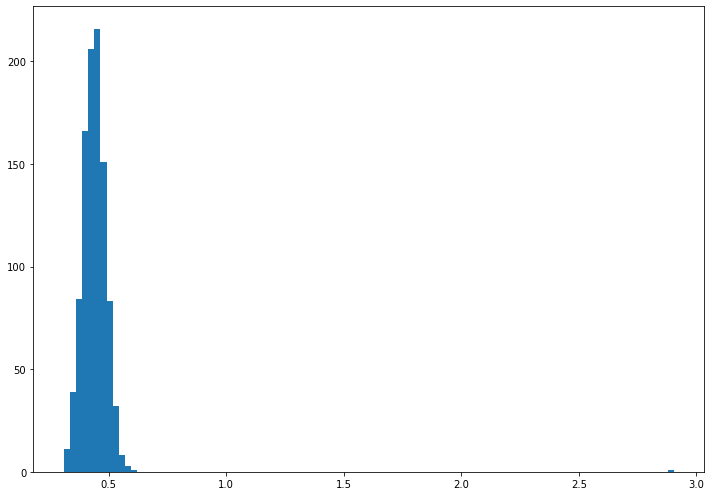

In [15]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(np.array(max_val_2)*50, bins = 100)
plt.show()